In [174]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [225]:
import os
import sys
import matplotlib.pyplot as plt

os.environ["KMP_DUPLICATE_LIB_OK"] = "True"
sys.path.append("..")

from src.datasets.sky_cover_dataset import SkyCoverModule
from src.config import SEED

In [226]:
sky_cover_module = SkyCoverModule(
    batch_size=1,
    n_workers=1,
    seed=SEED
)
sky_cover_module.setup(stage="fit")
sky_cover_module.setup(stage="test")
train_dataloader = sky_cover_module.train_dataloader()
val_dataloader = sky_cover_module.val_dataloader()
test_dataloader = sky_cover_module.test_dataloader()

🌱 Setting the seed to 0 for generating dataloaders.
🌱 Setting the seed to 0 for generating dataloaders.


In [227]:
it = iter(test_dataloader)

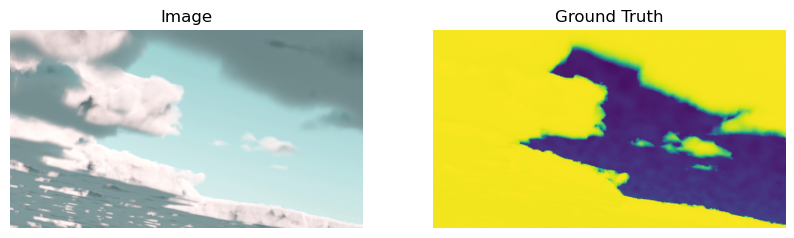

In [269]:
def unnormalize(
        image,
        mean=(0.485, 0.456, 0.406),
        std=(0.229, 0.224, 0.225),
    ):
    image = image.copy()
    image = image * std + mean
    image = image.clip(0, 1)
    return image

batch = next(it)
image = batch[0][0]
ground_truth = batch[1][0]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Image")
plt.imshow(unnormalize(image.numpy().transpose(1, 2, 0)))
plt.axis("off")
plt.subplot(1, 2, 2)
plt.title("Ground Truth")
plt.imshow(ground_truth.numpy().transpose(1, 2, 0), vmin=0, vmax=1)
plt.axis("off")
plt.show()

In [243]:
import numpy as np
np.unique(ground_truth.numpy().flatten())

array([0.00392157, 0.00784314, 0.01176471, 0.01568628, 0.01960784,
       0.02352941, 0.02745098, 0.03529412, 0.03921569, 0.04313726,
       0.04705882, 0.05098039, 0.05490196, 0.05882353, 0.06666667,
       0.07058824, 0.07450981, 0.07843138, 0.08235294, 0.08627451,
       0.09019608, 0.09803922, 0.10196079, 0.10588235, 0.10980392,
       0.11372549, 0.11764706, 0.12156863, 0.12941177, 0.13333334,
       0.13725491, 0.14117648, 0.14509805, 0.14901961, 0.15294118,
       0.15686275, 0.16470589, 0.16862746, 0.17254902, 0.1764706 ,
       0.18039216, 0.18431373, 0.1882353 , 0.19607843, 0.2       ,
       0.20392157, 0.20784314, 0.21176471, 0.21568628, 0.21960784,
       0.22745098, 0.23137255, 0.23529412, 0.23921569, 0.24313726,
       0.24705882, 0.2509804 , 0.25882354, 0.2627451 , 0.26666668,
       0.27058825, 0.27450982, 0.2784314 , 0.28235295, 0.28627452,
       0.29411766, 0.29803923, 0.3019608 , 0.30588236, 0.30980393,
       0.3137255 , 0.31764707, 0.3254902 , 0.32941177, 0.33333